In [1]:
! pip install cripser

In [2]:
! pip install persim

In [3]:
## load necessary libraries
%matplotlib inline
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider, Button, RadioButtons
import os,time,subprocess,glob
from PIL import Image
import cripser as cr
import tcripser as tcr
import persim
import skimage
from skimage import io
from skimage.transform import rotate
from skimage.data import cells3d
from skimage.filters import threshold_otsu
from scipy.ndimage import distance_transform_edt,convolve
import os, re
from tkinter import filedialog
import tkinter as tk



In [4]:
def resize_images(input_folder, output_folder, target_size):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through each file in the input folder
    for filename in os.listdir(input_folder):
        # Check if the file is an image file
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            # Open the image
            img_path = os.path.join(input_folder, filename)
            img = Image.open(img_path)

            # Resize the image
            resized_img = img.resize(target_size)


            # Save the resized image to the output folder
            output_path = os.path.join(output_folder, filename)
            resized_img.save(output_path)

    print("All images have been resized and saved to the output folder.")

def select_folder():
    root = tk.Tk()
    root.withdraw() # Hide the root window
    folder_path = filedialog.askdirectory()
    return folder_path

# Interactively select the input folder
input_folder = select_folder()

# Create the output folder with '_resized' extension
output_folder = input_folder + "_resized"

# Set the target size for resizing
target_size = (200, 200)  # Change this to the desired dimensions

# Resize images in the input folder and save to the output folder
resize_images(input_folder, output_folder, target_size)

All images have been resized and saved to the output folder.


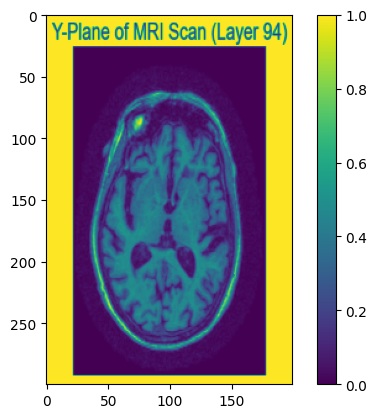

(300, 200, 8) float64 0.0--1.0


In [10]:
import tkinter as tk
from tkinter import filedialog
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob
import re
from skimage.transform import resize

root = tk.Tk()
root.withdraw()  # Hide the root window

# Disable LaTeX rendering in Matplotlib
plt.rcParams['text.usetex'] = False

# Ask the user to select the folder containing the images
img_folder = filedialog.askdirectory(title="Select the folder containing images")

if img_folder:  # If a folder is selected
    # Change directory to the selected folder
    os.chdir(img_folder)

    volfile = "img.npy"  ## the 3d image will be saved into this 3D numpy array file

    # Create a 3d stack from 2d images
    if os.path.isdir(img_folder):
        # Load image files from a dir and stack into a 3D array of type float64
        input_files = os.path.join(img_folder, "*.png")
        files = [f for f in glob.glob(input_files)]
        files.sort(key=lambda val: int(re.sub("\\D", "", val + "0")))
        
        # Resize images to a common size
        images_resized = [resize(np.array(Image.open(f).convert('L')), (300, 200)) for f in files]
        img3d = np.dstack(images_resized).astype('f8')
    else:
        ## Create a dummy stack from a single 2d image
        img2d = np.array(Image.open("path_to_your_single_image").convert('L'))
        img3d = np.dstack([rotate(img2d, 10 * i) for i in range(8)])

    np.save(volfile, img3d.astype(np.float64))

    # Display a slice from the middle of the 3D volume
    plt.imshow(img3d[:, :, img3d.shape[-1] // 2])
    plt.colorbar()  # Add colorbar for better interpretation if needed
    plt.show()
    print(img3d.shape, img3d.dtype, f"{np.min(img3d)}--{np.max(img3d)}")
else:
    print("No folder selected. Exiting.")


Betti numbers:  [10620, 13570, 2671]
Betti numbers:  [4421, 13450, 7453]
elapsed_time:2.6696958541870117 sec
[[0.00000000e+00 0.00000000e+00 2.64136002e-11 ... 1.56000000e+02
  1.75000000e+02 5.00000000e+00]
 [0.00000000e+00 2.64136002e-11 2.37722402e-10 ... 1.58000000e+02
  1.75000000e+02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.09655862e-09 ... 2.11000000e+02
  1.75000000e+02 2.00000000e+00]
 ...
 [2.00000000e+00 2.05210835e-02 2.08336077e-02 ... 6.60000000e+01
  1.46000000e+02 2.00000000e+00]
 [2.00000000e+00 2.00994342e-02 2.04836746e-02 ... 2.13000000e+02
  1.72000000e+02 6.00000000e+00]
 [2.00000000e+00 1.52587792e-02 1.91613541e-02 ... 4.20000000e+01
  1.06000000e+02 2.00000000e+00]]


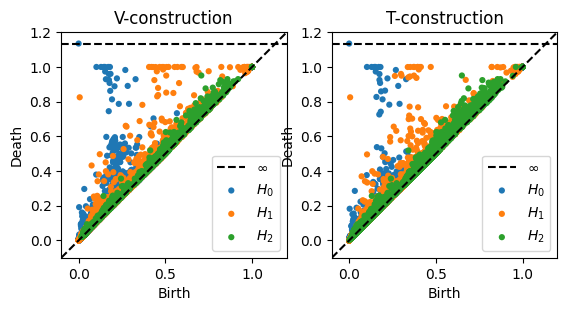

In [8]:
start = time.time()
pd = cr.computePH(img3d)
pds = [pd[pd[:,0] == i] for i in range(3)]
print("Betti numbers: ",[len(pds[i]) for i in range(len(pds))])

# compute PH for the T-construction of the original image (pixel value filtration)
pdt = tcr.computePH(img3d)
pdst = [pdt[pdt[:,0] == i] for i in range(3)]
print("Betti numbers: ",[len(pdst[i]) for i in range(len(pdst))])

print ("elapsed_time:{} sec".format(time.time() - start))
## plot persistent diagram using persim
fig,axs = plt.subplots(1,2)
# Set x-axis and y-axis limits for V-construction diagram

persim.plot_diagrams([p[:,1:3] for p in pds], ax=axs[0], title='V-construction')
persim.plot_diagrams([p[:,1:3] for p in pdst], ax=axs[1], title='T-construction')
print(pd)

In [2]:
pip install PersistenceImages


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for PersistenceImages: filename=PersistenceImages-1.3.3-py3-none-any.whl size=10393 sha256=d8f00b1a36d49c80f6648710d0dde3491bf066cf05849db3d6005147394bd7a3
  Stored in directory: c:\users\91703\appdata\local\pip\cache\wheels\7c\00\0f\3de16aba6c73622fc38d6ad12b7ad7f5dbe15299eeac5c6e64
Successfully built PersistenceImages
Note: you may need to restart the kernel to use updated packages.


In [3]:
import PersistenceImages.persistence_images as pimg
import matplotlib.pyplot as plt
import numpy as np
import persim

def plot_persistence_images(X, pds, n=10, max_life=8, pixel_size=1):
    pim = pimg.PersistenceImager(birth_range=(-max_life, max_life), pers_range=(0, max_life), pixel_size=pixel_size)

    nn = len(X) if len(X) < n else n
    fig, axs = plt.subplots(nn, 5, figsize=(nn*5, 4))
    for i in range(nn):
        img = X[i] * 255
        pd = pds[i]
        for d in range(2):
            heat = heat_map(img, pd, h=5, sigma=1, min_life=0, max_life=max_life, min_birth=-max_life, max_birth=max_life, dimension=d, location='death')
            heat = (heat / max(1, np.max(heat)) * 255).astype(np.uint8)
            axs[i, 0+d].imshow(np.dstack([heat, img // 2, img // 2]))
            axs[i, 0+d].set_title("Density of H{}".format(d))
            axs[i, 0+d].axis('off')
            axs[i, 2+d].imshow(pim.transform(pd[pd[:, 0] == d, 1:3]))
            axs[i, 2+d].set_title("Image of H{}".format(d))
            axs[i, 2+d].axis('off')
        persim.plot_diagrams([p[:, 1:3] for p in [pd[pd[:, 0] == j] for j in range(2)]], ax=axs[i, 4])


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create lists to store persistence images for H0 and H1
pims_h0, pims_h1 = [], []

# Loop over each sample in the dataset
for i in range(len(X)):
    pd = pds[i]
    # Clip birth and death values to avoid out-of-range errors
    pd[:,1:3] = np.clip(pd[:,1:3], a_min=-max_life, a_max=max_life) 

    # Transform PH0 and PH1 into persistence images
    pim0 = pim.transform(pd[pd[:,0]==0,1:3]) # Vectorize PH0 by persistence image
    pim1 = pim.transform(pd[pd[:,0]==1,1:3]) # Vectorize PH1 by persistence image

    # Append flattened persistence images to the lists
    pims_h0.append(pim0.ravel())
    pims_h1.append(pim1.ravel())

## Classification
# Split the dataset into training and testing sets
(trainX, testX, trainY, testY) = train_test_split(pims_h1, Y, test_size=0.3, random_state=0, stratify=Y) # Use PH1

# Initialize a Random Forest classifier with specified parameters
clf = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier on the training data
clf.fit(trainX, trainY)

# Predict the labels for the testing data
predY = clf.predict(testX)

# Evaluate the classifier's performance
print("Confusion matrix:\n", confusion_matrix(testY, predY))
print(classification_report(testY, predY))


NameError: name 'X' is not defined